In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score,roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.utils import resample
from scipy.cluster.hierarchy import linkage, dendrogram

In [5]:
df = pd.read_csv('podaci\clickstream+data+for+online+shopping\e-shop clothing 2008.csv', encoding='cp1252', sep=';')  # dodaj parametar sheet_name= ako ima više listova
print(df.columns)

Index(['year', 'month', 'day', 'order', 'country', 'session ID',
       'page 1 (main category)', 'page 2 (clothing model)', 'colour',
       'location', 'model photography', 'price', 'price 2', 'page'],
      dtype='object')


<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Korisnik\AppData\Local\Temp\ipykernel_110236\2991430657.py:1: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_csv('podaci\clickstream+data+for+online+shopping\e-shop clothing 2008.csv', encoding='cp1252', sep=';')  # dodaj parametar sheet_name= ako ima više listova


In [6]:
df.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1


In [7]:
print(df.isnull().sum())

year                       0
month                      0
day                        0
order                      0
country                    0
session ID                 0
page 1 (main category)     0
page 2 (clothing model)    0
colour                     0
location                   0
model photography          0
price                      0
price 2                    0
page                       0
dtype: int64


In [8]:
df['month'] = df['month'].replace({
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August'
})
df['month'].unique()

array(['April', 'May', 'June', 'July', 'August'], dtype=object)

Radi se na osnovu ip adrese

In [9]:
df['country'] = df['country'].replace({
    1: 'Australia',
    2: 'Austria',
    3: 'Belgium',
    4: 'British Virgin Islands',
    5: 'Cayman Islands',
    6: 'Christmas Island',
    7: 'Croatia',
    8: 'Cyprus',
    9: 'Czech Republic',
    10: 'Denmark',
    11: 'Estonia',
    12: 'unidentified',
    13: 'Faroe Islands',
    14: 'Finland',
    15: 'France',
    16: 'Germany',
    17: 'Greece',
    18: 'Hungary',
    19: 'Iceland',
    20: 'India',
    21: 'Ireland',
    22: 'Italy',
    23: 'Latvia',
    24: 'Lithuania',
    25: 'Luxembourg',
    26: 'Mexico',
    27: 'Netherlands',
    28: 'Norway',
    29: 'Poland',
    30: 'Portugal',
    31: 'Romania',
    32: 'Russia',
    33: 'San Marino',
    34: 'Slovakia',
    35: 'Slovenia',
    36: 'Spain',
    37: 'Sweden',
    38: 'Switzerland',
    39: 'Ukraine',
    40: 'United Arab Emirates',
    41: 'United Kingdom',
    42: 'USA',
    43: 'biz',
    44: 'com',
    45: 'int',
    46: 'net',
    47: 'org'
})
df['country'].unique()

array(['Poland', 'Ireland', 'Czech Republic', 'Germany', 'Switzerland',
       'Lithuania', 'United Kingdom', 'unidentified', 'Romania', 'com',
       'Slovakia', 'Norway', 'net', 'France', 'Denmark', 'Netherlands',
       'Croatia', 'Luxembourg', 'India', 'Greece', 'Italy', 'Iceland',
       'USA', 'Cyprus', 'Belgium', 'Sweden', 'Portugal', 'Finland', 'biz',
       'Latvia', 'org', 'Spain', 'Austria', 'San Marino', 'Russia', 'int',
       'Hungary', 'Estonia', 'United Arab Emirates', 'Christmas Island',
       'Ukraine', 'Australia', 'Slovenia', 'Faroe Islands',
       'British Virgin Islands', 'Mexico', 'Cayman Islands'], dtype=object)

In [10]:
df['page 1 (main category)'] = df['page 1 (main category)'].replace({
    1: 'trousers',
    2: 'skirts',
    3: 'blouses',
    4: 'sale'
})
df['page 1 (main category)'].unique()  

array(['trousers', 'skirts', 'blouses', 'sale'], dtype=object)

In [11]:
df['colour'] = df['colour'].replace({
    1: 'beige',
    2: 'black',
    3: 'blue',
    4: 'brown',
    5: 'burgundy',
    6: 'gray',
    7: 'green',
    8: 'navy blue',
    9: 'of many colors',
    10: 'olive',
    11: 'pink',
    12: 'red',
    13: 'violet',
    14: 'white'
})
df['colour'].unique()

array(['beige', 'olive', 'gray', 'brown', 'burgundy', 'of many colors',
       'red', 'pink', 'black', 'blue', 'violet', 'white', 'green',
       'navy blue'], dtype=object)

LOCATION -> pozicija slike na ekranu

In [12]:
df['location'] = df['location'].replace({
    1: 'top left',
    2: 'top in the middle',
    3: 'top right',
    4: 'bottom left',
    5: 'bottom in the middle',
    6: 'bottom right'
})
df['location'].unique()

array(['bottom in the middle', 'bottom right', 'top in the middle',
       'top right', 'top left', 'bottom left'], dtype=object)

In [13]:
df['model photography'] = df['model photography'].replace({
    1: 'en face',
    2: 'profile',
})
df['model photography'].unique()

array(['en face', 'profile'], dtype=object)

In [14]:
df['model photography'] = df['model photography'].replace({
    1: 'en face',
    2: 'profile',
})
df['model photography'].unique()

array(['en face', 'profile'], dtype=object)

In [15]:
df['price 2'] = df['price 2'].replace({
    1: 'yes',
    2: 'no',
})
df['price 2'].unique()

array(['no', 'yes'], dtype=object)

Nakon mapiranja

In [16]:
df.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,April,1,1,Poland,1,trousers,A13,beige,bottom in the middle,en face,28,no,1
1,2008,April,1,2,Poland,1,trousers,A16,beige,bottom right,en face,33,no,1
2,2008,April,1,3,Poland,1,skirts,B4,olive,top in the middle,en face,52,yes,1
3,2008,April,1,4,Poland,1,skirts,B17,gray,bottom right,profile,38,no,1
4,2008,April,1,5,Poland,1,skirts,B8,brown,top right,profile,52,yes,1


In [17]:
df_encoded = df.copy()

# Label Encoding za sve kategorijske kolone
label_cols = df_encoded.select_dtypes(include='object').columns
for col in label_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Standardizacija
scaler = StandardScaler()
X = scaler.fit_transform(df_encoded)

In [15]:
X

array([[ 0.        , -1.28933262, -1.53159929, ..., -1.25935522,
        -1.02395212, -0.72288203],
       [ 0.        , -1.28933262, -1.53159929, ..., -0.8608883 ,
        -1.02395212, -0.72288203],
       [ 0.        , -1.28933262, -1.53159929, ...,  0.65328597,
         0.97660816, -0.72288203],
       ...,
       [ 0.        , -0.63074423, -0.17264935, ..., -0.06395448,
        -1.02395212, -0.72288203],
       [ 0.        , -0.63074423, -0.17264935, ..., -0.06395448,
         0.97660816, -0.72288203],
       [ 0.        , -0.63074423, -0.17264935, ...,  1.05175288,
         0.97660816, -0.72288203]], shape=(165474, 14))

In [ ]:
for i in range(2,5):
    kmeans = KMeans(n_clusters=i, random_state=123)
    labels_kmeans = kmeans.fit_predict(X)

    print("KMeans Silhouette:", silhouette_score(X, labels_kmeans))
    df['KMeans_Cluster'] = labels_kmeans


    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['KMeans_Cluster'], palette='viridis')
    plt.title('KMeans')
    plt.show()

c:\Users\Korisnik\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Korisnik\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
  File "c:\Users\Korisnik\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\Korisnik\AppData\Local\Programs\

DBSCAN Silhouette Score: 0.04778529103589365


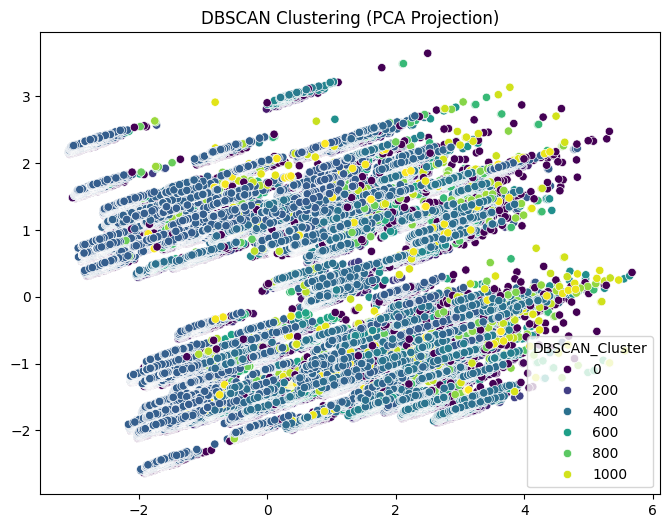

DBSCAN Silhouette Score: 0.037122013213199856


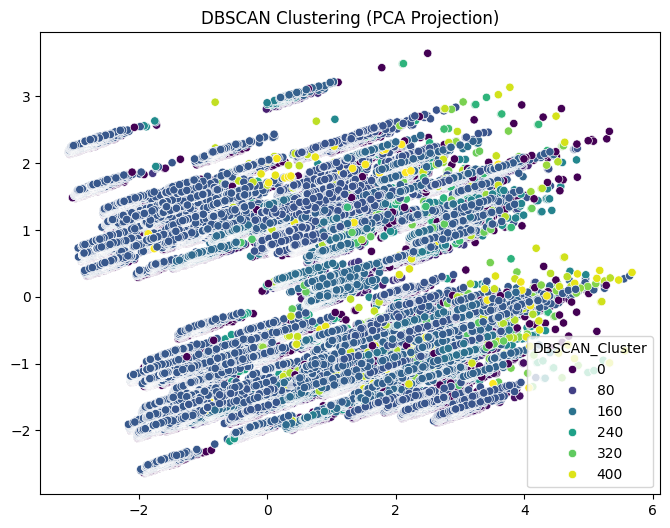

DBSCAN Silhouette Score: 0.02976471639858613


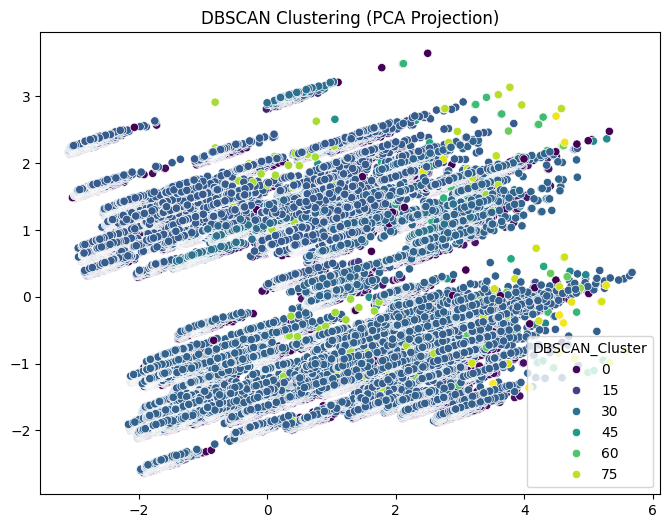

In [ ]:
for i in [1.2,1.5,2.0]:
    dbscan = DBSCAN(eps=i, min_samples=2)
    labels_dbscan = dbscan.fit_predict(X)

    print("DBSCAN Silhouette:", silhouette_score(X, labels_dbscan) if len(set(labels_dbscan)) > 1 else "N/A")
    df['DBSCAN_Cluster'] = labels_dbscan
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['DBSCAN_Cluster'], palette='viridis')
    plt.title('DBSCAN')
    plt.show()

In [ ]:
X_sample = resample(X, n_samples=1000, random_state=123)

In [ ]:
agg = AgglomerativeClustering(n_clusters=2)
labels_agg = agg.fit_predict(X_sample)

print("Agglomerative Clustering Silhouette Score:", silhouette_score(X_sample, labels_agg))

Agglomerative Clustering Silhouette Score: 0.1446515618847336


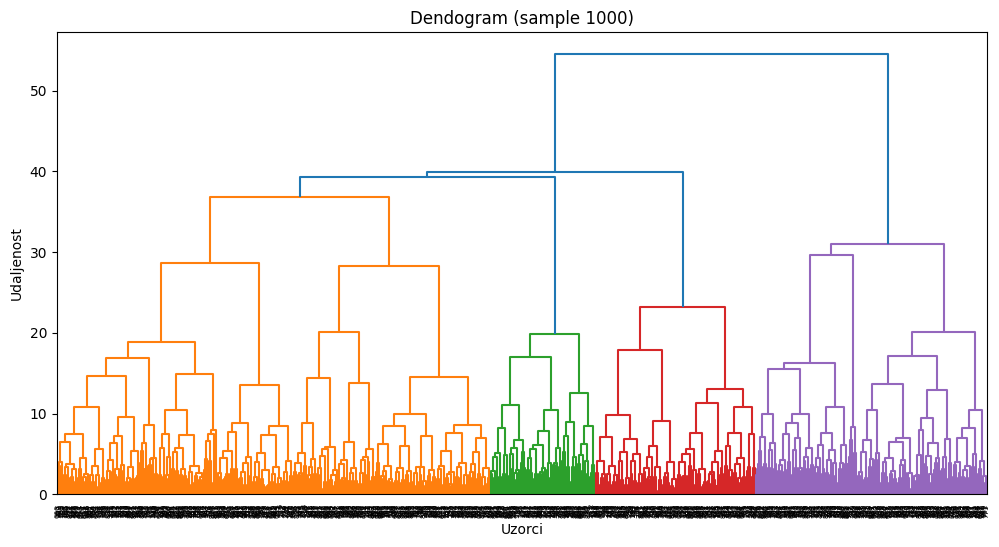

In [ ]:
linked = linkage(X_sample, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendogram')
plt.show()

Asocijativna analiza

In [18]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [19]:
df

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,April,1,1,Poland,1,trousers,A13,beige,bottom in the middle,en face,28,no,1
1,2008,April,1,2,Poland,1,trousers,A16,beige,bottom right,en face,33,no,1
2,2008,April,1,3,Poland,1,skirts,B4,olive,top in the middle,en face,52,yes,1
3,2008,April,1,4,Poland,1,skirts,B17,gray,bottom right,profile,38,no,1
4,2008,April,1,5,Poland,1,skirts,B8,brown,top right,profile,52,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,August,13,1,Poland,24024,skirts,B10,black,bottom left,en face,67,yes,1
165470,2008,August,13,1,Czech Republic,24025,trousers,A11,blue,bottom left,en face,62,yes,1
165471,2008,August,13,1,Slovakia,24026,trousers,A2,blue,top left,en face,43,no,1
165472,2008,August,13,2,Slovakia,24026,blouses,C2,red,top left,en face,43,yes,1


Grupisemo po sesijama

In [30]:
transactions = df.groupby("session ID")["page 1 (main category)"].apply(list).tolist()

In [31]:
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)

df_encoded = pd.DataFrame(te_array, columns=te.columns_)
df_encoded

,blouses,sale,skirts,trousers
0,True,True,True,True
1,False,True,True,True
2,True,True,True,False
3,True,False,False,True
4,True,False,False,False
...,...,...,...,...
24021,False,False,False,True
24022,False,True,False,True
24023,False,False,True,False
24024,False,False,False,True


In [ ]:
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(sale),(blouses),0.382586,0.446350,0.188754,0.493364,1.105330,1.0,0.017987,1.092796,0.154342,0.294844,0.084916,0.458124
1,(blouses),(sale),0.446350,0.382586,0.188754,0.422883,1.105330,1.0,0.017987,1.069826,0.172117,0.294844,0.065269,0.458124
2,(trousers),(blouses),0.544493,0.446350,0.247232,0.454059,1.017272,1.0,0.004198,1.014121,0.037274,0.332475,0.013924,0.503978
3,(blouses),(trousers),0.446350,0.544493,0.247232,0.553898,1.017272,1.0,0.004198,1.021081,0.030666,0.332475,0.020646,0.503978
4,"(skirts, sale)",(blouses),0.174103,0.446350,0.104096,0.597896,1.339524,1.0,0.026385,1.376884,0.306898,0.201596,0.273722,0.415556
5,"(skirts, blouses)",(sale),0.208316,0.382586,0.104096,0.499700,1.306114,1.0,0.024397,1.234089,0.296040,0.213834,0.189686,0.385892
6,"(blouses, sale)",(skirts),0.188754,0.478232,0.104096,0.551488,1.153182,1.0,0.013827,1.163332,0.163741,0.184930,0.140401,0.384578
7,(skirts),"(blouses, sale)",0.478232,0.188754,0.104096,0.217668,1.153182,1.0,0.013827,1.036958,0.254585,0.184930,0.035641,0.384578
8,(sale),"(skirts, blouses)",0.382586,0.208316,0.104096,0.272084,1.306114,1.0,0.024397,1.087604,0.379599,0.213834,0.080548,0.385892
9,(blouses),"(skirts, sale)",0.446350,0.174103,0.104096,0.233215,1.339524,1.0,0.026385,1.077091,0.457809,0.201596,0.071573,0.415556


In [40]:
frequent_itemsets

,support,itemsets
0,0.446350,(blouses)
1,0.382586,(sale)
2,0.478232,(skirts)
3,0.544493,(trousers)
4,0.188754,"(sale, blouses)"
5,0.208316,"(skirts, blouses)"
6,0.247232,"(trousers, blouses)"
7,0.174103,"(skirts, sale)"
8,0.202655,"(trousers, sale)"
9,0.224840,"(trousers, skirts)"
